In [41]:
from __future__ import print_function
from matplotlib import pyplot as plt
# get_ipython().magic(u'matplotlib auto')
import tensorflow as tf
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# import torch
from tensorflow import keras

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation
from tensorflow import reshape
from keras.utils import np_utils
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling1D,AveragePooling1D
from tensorflow.keras.layers import SeparableConv1D, Bidirectional
from tensorflow.keras.layers import ZeroPadding2D,ZeroPadding1D, MaxPooling2D, Bidirectional
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [43]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
# import coremltools
# from torch import nn, optim
# import torch.nn.functional as F
import scipy.io
from scipy import stats
#from IPython.display import display, HTML
from tensorflow.keras import optimizers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import TimeDistributed
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [4]:
def historyVisualization(history):
    # Plot training & validation loss values
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['mean_absolute_error'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['MSE', 'MAE'], loc='upper left')
    plt.show()
def plotPredict(y_pred, y_test):
    plt.title('Predicted vs Actual')
    plt.xlabel('x')
    plt.ylabel('value')
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual ')
    plt.legend()
    plt.show()


In [17]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(20, 14))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [6]:
mat1=scipy.io.loadmat('/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_sEMG_preprocess_data.mat')
nina_raw_train=mat1['Training_process_data']
# # nina_raw_valid=mat1['Valid_raw_data']
nina_raw_test=mat1['Testing_process_data'] 
print('raw_Train_data',nina_raw_train)
# # print('raw_valid_data',nina_raw_valid)
print('raw_Test_data',nina_raw_test)

raw_Train_data [[7.19998933e-03 2.42352611e-03 4.92862675e-03 ... 2.41300425e-03
  2.46727202e-03 1.00000000e+00]
 [8.36245258e-03 2.42505276e-03 4.78253686e-03 ... 2.41365181e-03
  2.47075415e-03 1.00000000e+00]
 [9.48596411e-03 2.42667848e-03 4.64077575e-03 ... 2.41454821e-03
  2.47536253e-03 1.00000000e+00]
 ...
 [3.94424454e-03 2.62137279e-03 2.73581110e-03 ... 3.48976948e-03
  6.15271911e-02 5.20000000e+01]
 [3.96512364e-03 2.61904942e-03 2.73113030e-03 ... 3.47546397e-03
  6.08175908e-02 5.20000000e+01]
 [3.98214675e-03 2.61795167e-03 2.72887543e-03 ... 3.46790621e-03
  6.02362927e-02 5.20000000e+01]]
raw_Test_data [[3.17589407e-02 2.47425303e-03 2.43502657e-03 ... 2.43772337e-03
  2.40898095e-03 1.00000000e+00]
 [3.20504199e-02 2.47780922e-03 2.44445360e-03 ... 2.43977223e-03
  2.40927484e-03 1.00000000e+00]
 [3.23410828e-02 2.48228892e-03 2.45355130e-03 ... 2.44207134e-03
  2.40962348e-03 1.00000000e+00]
 ...
 [2.50557773e-03 2.54337291e-03 2.60044457e-03 ... 2.57131761e-03
  1

In [7]:
np.savetxt("/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Train.csv", nina_raw_train, delimiter=",")
np.savetxt("/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Test.csv", nina_raw_test, delimiter=",")
# # np.savetxt("/content/drive/My Drive/codes/nina_prep_python/rawdata/nina_pro_Valid.csv", nina_raw_valid, delimiter=",")

In [8]:
file_path_Train= "/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Train.csv"
file_path_Test= "/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Test.csv"
# file_path_Valid= "/content/drive/My Drive/codes/nina_prep_python/rawdata/nina_pro_Valid.csv"
# file_path_Train= "./nina_pro_Train_E123.csv"
# file_path_Test= "./nina_pro_Test_E123.csv"
# Set some standard parameters upfront
pd.options.display.float_format = '{:.1f}'.format
sns.set() # Default seaborn look and feel
#plt.style.use('ggplot')
print('keras version ', keras.__version__)
# Same labels will be reused throughout the program
LABELS=[]
for i in range(1,53,1):
  LABELS.append (i)
print(LABELS)
# LABELS = ['1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11','12','13',\
# '14','15','16','17','18','19','20','21','22','23','24','25','26','27','28',\
# '29','30','31','32','33','34','35','36','37','38','39','40','41','42','43',\
# '44','45','46','47','48','49','50','51','52']
#LABELS = np.asarray(LABELS)

keras version  2.3.0-tf
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


In [9]:
# The number of steps within one time segment
TIME_PERIODS = 512
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 512
n_features = 10

In [10]:
def read_data_Train(file_path_Train):
    column_names = ['C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C10','Class_label']
    df_Train = pd.read_csv(file_path_Train,
                     header=None,
                     names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Train['Class_label'].replace(regex=True,
      inplace=True,
      to_replace=r';',
      value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Train['Class_label'] = df_Train['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Train.dropna(axis=0, how='any', inplace=True)
    return df_Train
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

In [11]:
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [12]:
def read_data_Test(file_path_Test):
    column_names = ['C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C10','Class_label']
    df_Test = pd.read_csv(file_path_Test,
                     header=None,
                     names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Test['Class_label'].replace(regex=True,
      inplace=True,
      to_replace=r';',
      value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Test['Class_label'] = df_Test['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Test.dropna(axis=0, how='any', inplace=True)
    return df_Test

In [13]:
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

In [14]:
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [15]:
df_Train = read_data_Train('/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Train.csv')
# Describe the data
show_basic_dataframe_info(df_Train)
df_Train.head(20)

Number of columns in the dataframe: 11
Number of rows in the dataframe: 5031936



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


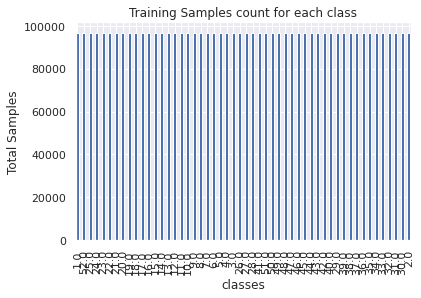

In [19]:
df_Train['Class_label'].value_counts().plot(kind='bar',
                                   title='Training Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
#plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [21]:
df_Test = read_data_Test('/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Test.csv')
# Describe the data
show_basic_dataframe_info(df_Test)
df_Test.head(20)


Number of columns in the dataframe: 11
Number of rows in the dataframe: 2156544



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


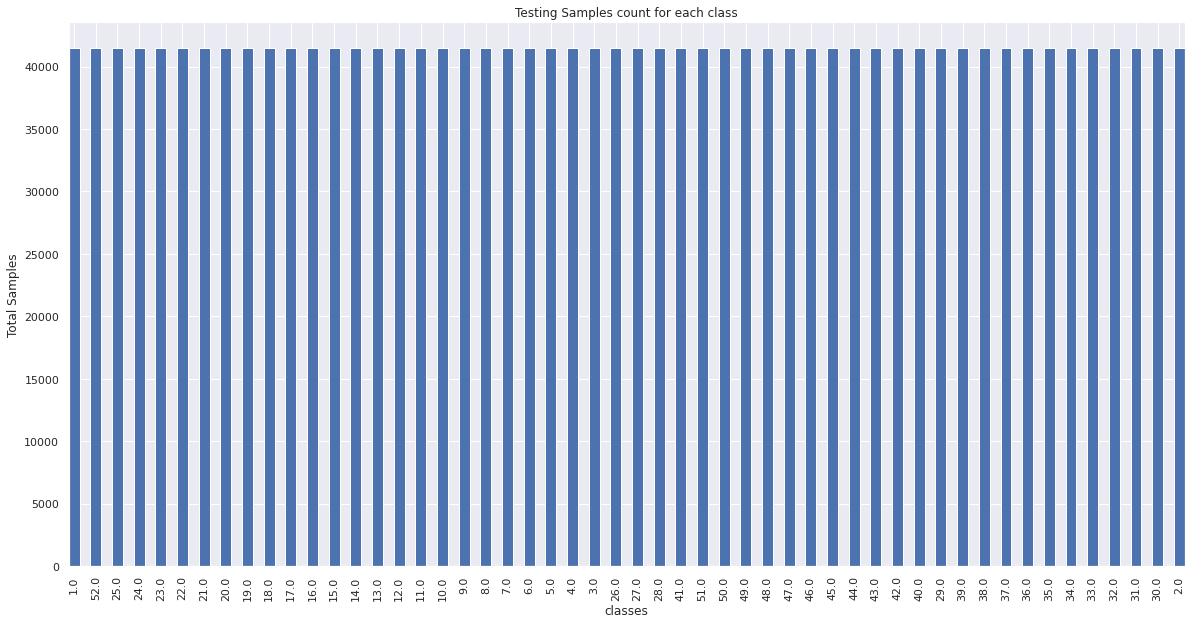

In [22]:
df_Test['Class_label'].value_counts().plot(kind='bar',
                                   title='Testing Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [23]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,0.00720,0.00242,0.00493,0.00242,0.00245,0.00241,0.00308,0.01634,0.00241,0.00247,1.00000
1,0.00836,0.00243,0.00478,0.00242,0.00245,0.00241,0.00312,0.01699,0.00241,0.00247,1.00000
2,0.00949,0.00243,0.00464,0.00242,0.00246,0.00241,0.00317,0.01762,0.00241,0.00248,1.00000
3,0.01052,0.00243,0.00451,0.00242,0.00246,0.00241,0.00322,0.01822,0.00242,0.00248,1.00000
4,0.01142,0.00243,0.00439,0.00242,0.00246,0.00241,0.00327,0.01877,0.00242,0.00248,1.00000


In [24]:
scaler = preprocessing.StandardScaler().fit(df_Train.iloc[:,0:n_features])

In [25]:
df_Train.iloc[:,0:n_features]=scaler.transform(df_Train.iloc[:,0:n_features])

In [26]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,-0.67229,-0.63485,-0.51161,-0.43213,-0.36882,-0.45281,-0.75398,-0.90170,-0.51352,-0.77192,1.00000
1,-0.66990,-0.63485,-0.51198,-0.43213,-0.36879,-0.45280,-0.75392,-0.90043,-0.51352,-0.77191,1.00000
2,-0.66759,-0.63485,-0.51234,-0.43212,-0.36875,-0.45280,-0.75384,-0.89918,-0.51352,-0.77190,1.00000
3,-0.66546,-0.63484,-0.51268,-0.43212,-0.36871,-0.45280,-0.75376,-0.89799,-0.51352,-0.77189,1.00000
4,-0.66362,-0.63483,-0.51299,-0.43211,-0.36867,-0.45279,-0.75369,-0.89691,-0.51351,-0.77188,1.00000


In [27]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,0.03176,0.00247,0.00244,0.00240,0.00244,0.00240,0.00258,0.03562,0.00244,0.00241,1.00000
1,0.03205,0.00248,0.00244,0.00240,0.00245,0.00240,0.00258,0.03567,0.00244,0.00241,1.00000
2,0.03234,0.00248,0.00245,0.00240,0.00246,0.00240,0.00259,0.03569,0.00244,0.00241,1.00000
3,0.03261,0.00249,0.00246,0.00240,0.00246,0.00240,0.00260,0.03570,0.00244,0.00241,1.00000
4,0.03285,0.00249,0.00246,0.00240,0.00246,0.00240,0.00261,0.03566,0.00245,0.00241,1.00000


In [28]:
df_Test.iloc[:,0:n_features]=scaler.transform(df_Test.iloc[:,0:n_features])

In [29]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,-0.62181,-0.63470,-0.51795,-0.43219,-0.36893,-0.45286,-0.75480,-0.86372,-0.51346,-0.77206,1.00000
1,-0.62121,-0.63469,-0.51792,-0.43219,-0.36881,-0.45286,-0.75479,-0.86364,-0.51345,-0.77206,1.00000
2,-0.62061,-0.63468,-0.51790,-0.43219,-0.36872,-0.45286,-0.75477,-0.86358,-0.51345,-0.77206,1.00000
3,-0.62006,-0.63467,-0.51789,-0.43219,-0.36867,-0.45286,-0.75476,-0.86357,-0.51344,-0.77205,1.00000
4,-0.61957,-0.63465,-0.51789,-0.43219,-0.36865,-0.45286,-0.75474,-0.86364,-0.51344,-0.77205,1.00000


In [30]:
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df_Train[LABEL] = le.fit_transform(df_Train['Class_label'].values.ravel())
# df_Valid[LABEL] = le.fit_transform(df_Valid['Class_label'].values.ravel())
df_Test[LABEL] = le.fit_transform(df_Test['Class_label'].values.ravel())
print('df_train_size',df_Train)
# print('df_valid_size',df_Valid)
print('df_test_size',df_Test)

df_train_size               C1       C2       C3       C4       C5       C6       C7  \
0       -0.67229 -0.63485 -0.51161 -0.43213 -0.36882 -0.45281 -0.75398   
1       -0.66990 -0.63485 -0.51198 -0.43213 -0.36879 -0.45280 -0.75392   
2       -0.66759 -0.63485 -0.51234 -0.43212 -0.36875 -0.45280 -0.75384   
3       -0.66546 -0.63484 -0.51268 -0.43212 -0.36871 -0.45280 -0.75376   
4       -0.66362 -0.63483 -0.51299 -0.43211 -0.36867 -0.45279 -0.75369   
...          ...      ...      ...      ...      ...      ...      ...   
5031931 -0.67906 -0.63424 -0.51714 -0.43021 -0.35403  0.13654  0.12757   
5031932 -0.67903 -0.63426 -0.51716 -0.43025 -0.35431  0.13208  0.11671   
5031933 -0.67898 -0.63427 -0.51718 -0.43028 -0.35465  0.12755  0.10702   
5031934 -0.67894 -0.63427 -0.51719 -0.43031 -0.35495  0.12339  0.09885   
5031935 -0.67890 -0.63428 -0.51720 -0.43032 -0.35514  0.11980  0.09225   

              C8       C9      C10  Class_label  ActivityEncoded  
0       -0.90170 -0.51352 -0.7

In [31]:
def create_segments_and_labels(df, time_steps,step, label_name):
    # x, y, z acceleration as features
    # N_FEATURES = 10
    # Number of steps to advance in each iteration (for me, it should always
    # be equal to the time_steps in order to have no overlap between segments)
    # step = time_steps
	#step = 200
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
        c1s = df['C1'].values[i: i + time_steps]
        c2s = df['C2'].values[i: i + time_steps]
        c3s = df['C3'].values[i: i + time_steps]
        c4s = df['C4'].values[i: i + time_steps]
        c5s = df['C5'].values[i: i + time_steps]
        c6s = df['C6'].values[i: i + time_steps]
        c7s = df['C7'].values[i: i + time_steps]
        c8s = df['C8'].values[i: i + time_steps]
        c9s = df['C9'].values[i: i + time_steps]
        c10s = df['C10'].values[i: i + time_steps]
        # Retrieve the most often used label in this segment
      #  label_name - label_name.astype(int)
        label = stats.mode(df[label_name][i: i + time_steps])[0][0]
        segments.append([c1s, c2s, c3s,c4s, c5s, c6s,c7s, c8s, c9s,c10s])
        # segments = pd.concat([c1s, c2s, c3s,c4s, c5s, c6s,c7s, c8s, c9s, c10s], axis=1)
        labels.append(label)
    # Bring the segments into a better shape
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, n_features)
    labels = np.asarray(labels)
    return reshaped_segments, labels

In [32]:
x_train, y_train = create_segments_and_labels(df_Train,TIME_PERIODS,STEP_DISTANCE,LABEL)
print('x_train shape: ', x_train.shape)
# print(x_train)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
print(num_time_periods)
print(num_sensors)
num_classes = le.classes_.size
print(list(le.classes_))
# input_shape = (num_time_periods,num_sensors)
# print(input_shape)
input_shape = (num_time_periods,num_sensors)
#x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train[0].shape)
print('input_shape:', input_shape)
x_train = x_train.astype('float32')
# x_train = [torch.tensor(arr, dtype=torch.float32) for arr in x_train]
# y_train = y_train.astype('float32')
# print(y_train)
y_train_hot = np_utils.to_categorical(y_train, num_classes)
print(y_train_hot)
# y_train_hot= [torch.tensor(arr, dtype=torch.uint8) for arr in y_train_hot]
print('New y_train shape: ', y_train_hot.shape)

x_train shape:  (9827, 512, 10)
9827 training samples
y_train shape:  (9827,)
512
10
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0]
x_train shape: (512, 10)
input_shape: (512, 10)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
New y_train shape:  (9827, 52)


In [33]:
x_test, y_test = create_segments_and_labels(df_Test,
                                            TIME_PERIODS,
                                            STEP_DISTANCE,
                                            LABEL)
print('x_test shape: ', x_test.shape)
# print(x_train)
print(x_test.shape[0], 'testing samples')
print('y_test shape: ', y_test.shape)
# Set input_shape / reshape for Keras
#x_test = x_test.reshape(x_test.shape[0], input_shape)
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')
y_test_hot = np_utils.to_categorical(y_test, num_classes)

x_test shape:  (4211, 512, 10)
4211 testing samples
y_test shape:  (4211,)


In [34]:
# n_steps, n_length = 20, 25
# n_steps, n_length= 10, 50
# n_steps, n_length= 16, 32
n_steps, n_length = 4, 128
n_depth=10
x_train = x_train.reshape(x_train.shape[0], n_steps, n_length,n_depth)
print('x_train shape: ', x_train.shape)
# x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_length, n_depth)
# print('x_valid shape: ', x_valid.shape)
x_test = x_test.reshape(x_test.shape[0], n_steps, n_length,n_depth)
print('x_test shape: ', x_test.shape)
n_outputs = y_train_hot.shape[1]
print('n_outputs',n_outputs)

x_train shape:  (9827, 4, 128, 10)
x_test shape:  (4211, 4, 128, 10)
n_outputs 52


In [35]:
verbose, epochs, batch_size = 0, 500, 16

In [ ]:
from keras import backend as K
class peel_the_layer(tf.keras.layers.Layer): 
    def __init__(self):    
        # Nothing special to be done here
        super(peel_the_layer, self).__init__()
        
    def build(self, input_shape):
    # For convenience sake, add a couple of properties
    self.ip_dimension= input_shape[-1] ##Last value of inp:256
    self.seq_len = input_shape[-2]  ##Last but 1 value:19
    num_units = 1
    self.W = self.add_weight((ip_dimension,num_units),
                                 initializer='normal')
        
    self.b = self.add_weight((seq_len,num_units),
                                 initializer='zero')
        
    def call(self, x):
    e = K.tanh(K.dot(x,self.w)+self.b)
    e = Flatten()(e)
    a = Activation('softmax')(e) 
    # Don't manipulate 'a'. It needs to be 'return'ed intact
    temp = RepeatVector(self.ip_dimension)(a) 
    temp = Permute([2,1])(temp) 
 
    output = Multiply()([x,temp])
    output = Lambda(lambda values: K.sum(values, axis=1))(output)
        
    return a, output


In [36]:
model = Sequential()
model.add(TimeDistributed(SeparableConv1D(filters=128, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
                           input_shape=(n_steps,n_length,n_depth)))
model.add(TimeDistributed(MaxPooling1D(pool_size=8,strides=2)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(SeparableConv1D(filters=128, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Dropout(0.2093)))
model.add(TimeDistributed(SeparableConv1D(filters=128, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Dropout(0.2093)))
model.add(TimeDistributed(SeparableConv1D(filters=128, kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Dropout(0.2093)))
model.add(TimeDistributed(Activation('relu')))
model.add(TimeDistributed(Flatten()))
model.add(Bidirectional(LSTM(200,return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(200,return_sequences=True)))
model.add(Dropout(0.5))
model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
model.add(Bidirectional(LSTM(200)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='tanh'))
model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
model.add(Dense(n_outputs, activation='softmax'))

In [37]:
adam=optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
checkpoint_filepath = '/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/LSTM512X10/checkpoint.hdf5'
# model.load_weights(checkpoint_filepath) 
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,verbose=1, monitor='val_accuracy',save_weights_only=True,save_best_only=True)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 4, 64, 128)        1498      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 4, 29, 128)        0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 4, 29, 128)        0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 4, 15, 128)        17152     
_________________________________________________________________
time_distributed_4 (TimeDist (None, 4, 15, 128)        0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, 4, 15, 128)        0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 4, 8, 128)         1

In [38]:
tf.keras.utils.plot_model(model, to_file='/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/LSTM512X10/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [39]:
csv_logger = CSVLogger('/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/LSTM512X10/LSTM_nina_20X100.csv', append=True, separator=';')
history = model.fit(x_train, y_train_hot, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger,checkpoint_callback,early],validation_data=(x_test, y_test_hot), verbose=1)

Epoch 1/500
615/615 [==============================] - ETA: 0s - loss: 4.3613 - accuracy: 0.0346
Epoch 00001: val_accuracy improved from -inf to 0.09024, saving model to /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/LSTM512X10/checkpoint.hdf5
615/615 [==============================] - 32s 52ms/step - loss: 4.3613 - accuracy: 0.0346 - val_loss: 3.5511 - val_accuracy: 0.0902
Epoch 2/500
613/615 [============================>.] - ETA: 0s - loss: 3.7392 - accuracy: 0.0720
Epoch 00002: val_accuracy improved from 0.09024 to 0.15721, saving model to /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/LSTM512X10/checkpoint.hdf5
615/615 [==============================] - 14s 22ms/step - loss: 3.7381 - accuracy: 0.0721 - val_loss: 3.1982 - val_accuracy: 0.1572
Epoch 3/500
615/615 [==============================] - ETA: 0s - loss: 3.4128 - accuracy: 0.1228
Epoch 00003: val_accuracy improved from 0.15721 to 0.22536, saving model to /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/LSTM512X10/checkpoint.h

Epoch 23/500
615/615 [==============================] - ETA: 0s - loss: 1.8208 - accuracy: 0.4642
Epoch 00023: val_accuracy improved from 0.62076 to 0.63595, saving model to /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/LSTM512X10/checkpoint.hdf5
615/615 [==============================] - 15s 24ms/step - loss: 1.8208 - accuracy: 0.4642 - val_loss: 1.2092 - val_accuracy: 0.6360
Epoch 24/500
615/615 [==============================] - ETA: 0s - loss: 1.7869 - accuracy: 0.4715
Epoch 00024: val_accuracy improved from 0.63595 to 0.64474, saving model to /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/LSTM512X10/checkpoint.hdf5
615/615 [==============================] - 15s 24ms/step - loss: 1.7869 - accuracy: 0.4715 - val_loss: 1.1692 - val_accuracy: 0.6447
Epoch 25/500
615/615 [==============================] - ETA: 0s - loss: 1.7614 - accuracy: 0.4757
Epoch 00025: val_accuracy improved from 0.64474 to 0.64711, saving model to /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/LSTM512X10/checkp

Epoch 46/500
613/615 [============================>.] - ETA: 0s - loss: 1.3009 - accuracy: 0.5993
Epoch 00046: val_accuracy improved from 0.77108 to 0.77583, saving model to /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/LSTM512X10/checkpoint.hdf5
615/615 [==============================] - 14s 22ms/step - loss: 1.3010 - accuracy: 0.5991 - val_loss: 0.7334 - val_accuracy: 0.7758
Epoch 47/500
613/615 [============================>.] - ETA: 0s - loss: 1.2622 - accuracy: 0.6111
Epoch 00047: val_accuracy improved from 0.77583 to 0.78081, saving model to /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/LSTM512X10/checkpoint.hdf5
615/615 [==============================] - 13s 21ms/step - loss: 1.2628 - accuracy: 0.6109 - val_loss: 0.7248 - val_accuracy: 0.7808
Epoch 48/500
613/615 [============================>.] - ETA: 0s - loss: 1.2691 - accuracy: 0.6027
Epoch 00048: val_accuracy did not improve from 0.78081
615/615 [==============================] - 13s 21ms/step - loss: 1.2707 - accuracy: 0

Epoch 71/500
613/615 [============================>.] - ETA: 0s - loss: 0.9230 - accuracy: 0.7084
Epoch 00071: val_accuracy did not improve from 0.84327
615/615 [==============================] - 13s 21ms/step - loss: 0.9231 - accuracy: 0.7085 - val_loss: 0.5333 - val_accuracy: 0.8347
Epoch 72/500
615/615 [==============================] - ETA: 0s - loss: 0.8841 - accuracy: 0.7191
Epoch 00072: val_accuracy did not improve from 0.84327
615/615 [==============================] - 13s 21ms/step - loss: 0.8841 - accuracy: 0.7191 - val_loss: 0.5220 - val_accuracy: 0.8395
Epoch 73/500
613/615 [============================>.] - ETA: 0s - loss: 0.8794 - accuracy: 0.7234
Epoch 00073: val_accuracy did not improve from 0.84327
615/615 [==============================] - 12s 20ms/step - loss: 0.8800 - accuracy: 0.7231 - val_loss: 0.5208 - val_accuracy: 0.8402
Epoch 74/500
615/615 [==============================] - ETA: 0s - loss: 0.8571 - accuracy: 0.7215
Epoch 00074: val_accuracy improved from 0.84

Epoch 96/500
613/615 [============================>.] - ETA: 0s - loss: 0.6111 - accuracy: 0.8015
Epoch 00096: val_accuracy improved from 0.87058 to 0.87176, saving model to /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/LSTM512X10/checkpoint.hdf5
615/615 [==============================] - 13s 22ms/step - loss: 0.6110 - accuracy: 0.8017 - val_loss: 0.4433 - val_accuracy: 0.8718
Epoch 97/500
614/615 [============================>.] - ETA: 0s - loss: 0.6028 - accuracy: 0.8070
Epoch 00097: val_accuracy improved from 0.87176 to 0.87343, saving model to /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/LSTM512X10/checkpoint.hdf5
615/615 [==============================] - 13s 22ms/step - loss: 0.6029 - accuracy: 0.8070 - val_loss: 0.4372 - val_accuracy: 0.8734
Epoch 98/500
614/615 [============================>.] - ETA: 0s - loss: 0.6049 - accuracy: 0.8038
Epoch 00098: val_accuracy did not improve from 0.87343
615/615 [==============================] - 13s 21ms/step - loss: 0.6057 - accuracy: 0

Epoch 147/500
614/615 [============================>.] - ETA: 0s - loss: 0.2923 - accuracy: 0.9049
Epoch 00147: val_accuracy did not improve from 0.90074
615/615 [==============================] - 13s 21ms/step - loss: 0.2927 - accuracy: 0.9048 - val_loss: 0.4177 - val_accuracy: 0.8927
Epoch 148/500
615/615 [==============================] - ETA: 0s - loss: 0.2845 - accuracy: 0.9049
Epoch 00148: val_accuracy did not improve from 0.90074
615/615 [==============================] - 13s 21ms/step - loss: 0.2845 - accuracy: 0.9049 - val_loss: 0.4229 - val_accuracy: 0.8943
Epoch 149/500
615/615 [==============================] - ETA: 0s - loss: 0.2874 - accuracy: 0.9047
Epoch 00149: val_accuracy did not improve from 0.90074
615/615 [==============================] - 13s 21ms/step - loss: 0.2874 - accuracy: 0.9047 - val_loss: 0.4213 - val_accuracy: 0.8941
Epoch 150/500
613/615 [============================>.] - ETA: 0s - loss: 0.2785 - accuracy: 0.9087
Epoch 00150: val_accuracy did not improv

Epoch 174/500
613/615 [============================>.] - ETA: 0s - loss: 0.2130 - accuracy: 0.9309
Epoch 00174: val_accuracy did not improve from 0.90525
615/615 [==============================] - 14s 22ms/step - loss: 0.2149 - accuracy: 0.9305 - val_loss: 0.4318 - val_accuracy: 0.9033
Epoch 175/500
613/615 [============================>.] - ETA: 0s - loss: 0.1985 - accuracy: 0.9341
Epoch 00175: val_accuracy improved from 0.90525 to 0.90572, saving model to /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/LSTM512X10/checkpoint.hdf5
615/615 [==============================] - 14s 23ms/step - loss: 0.1987 - accuracy: 0.9341 - val_loss: 0.4215 - val_accuracy: 0.9057
Epoch 176/500
614/615 [============================>.] - ETA: 0s - loss: 0.2117 - accuracy: 0.9303
Epoch 00176: val_accuracy did not improve from 0.90572
615/615 [==============================] - 14s 22ms/step - loss: 0.2119 - accuracy: 0.9302 - val_loss: 0.4141 - val_accuracy: 0.9055


In [44]:
best_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
print('epoch_number',best_index+1)
print('train accuracy and validation accuracy', history.history['accuracy'][best_index], history.history['val_accuracy'][best_index])

epoch_number 175
train accuracy and validation accuracy 0.934059202671051 0.9057230949401855


In [45]:
model.save('/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/LSTM512X10/CNN_LSTM_nina_5X97')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/LSTM512X10/CNN_LSTM_nina_5X97/assets


history loss
history accuracy
history val_loss
history val_accuracy


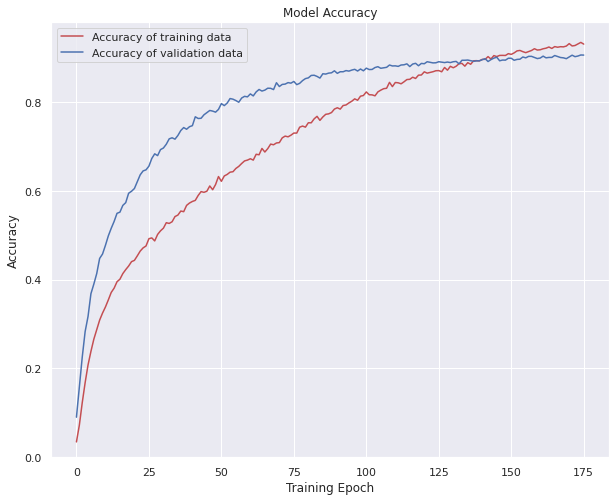

In [46]:
for i in history.history:
    print("history",i)
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

history loss
history accuracy
history val_loss
history val_accuracy


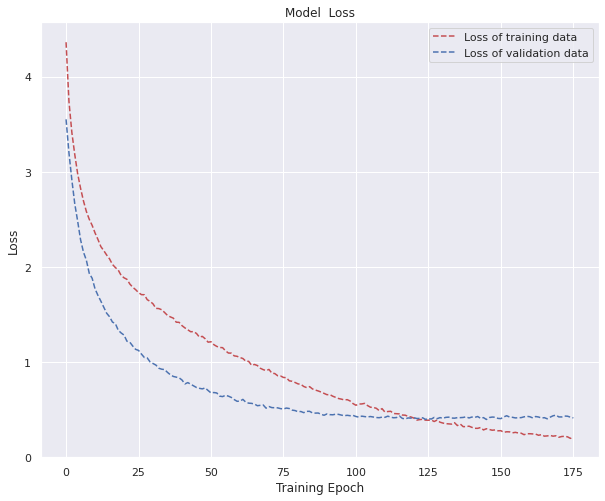

In [47]:
for i in history.history:
    print("history",i)
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [48]:
model.load_weights(checkpoint_filepath) 
_, testaccuracy = model.evaluate(x_test, y_test_hot, batch_size=batch_size, verbose=1)
print('test_accuracy',testaccuracy)

264/264 [==============================] - 2s 8ms/step - loss: 0.4215 - accuracy: 0.9057
test_accuracy 0.9057230949401855


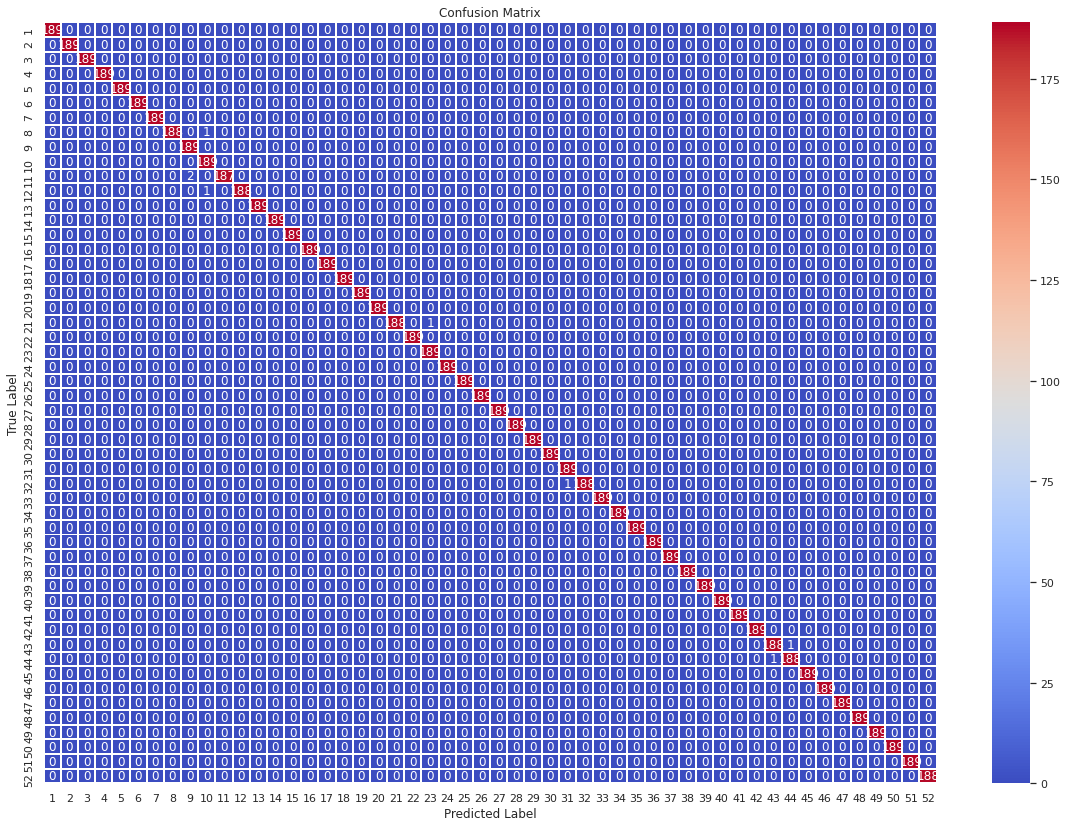

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       1.00      1.00      1.00       189
           2       1.00      1.00      1.00       189
           3       1.00      1.00      1.00       189
           4       1.00      1.00      1.00       189
           5       1.00      1.00      1.00       189
           6       1.00      1.00      1.00       189
           7       1.00      0.99      1.00       189
           8       0.99      1.00      0.99       189
           9       0.99      1.00      0.99       189
          10       1.00      0.99      0.99       189
          11       1.00      0.99      1.00       189
          12       1.00      1.00      1.00       189
          13       1.00      1.00      1.00       189
          14       1.00      1.00      1.00       189
          15       1.00      1.00      1.00       189
          16       1.00      1.00      1.00       189
          17       1.00    

In [50]:
y_pred_train = model.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
#max_y_train = np.argmax(y_train, axis=1)
show_confusion_matrix(y_train, max_y_pred_train)
print(classification_report(y_train, max_y_pred_train))

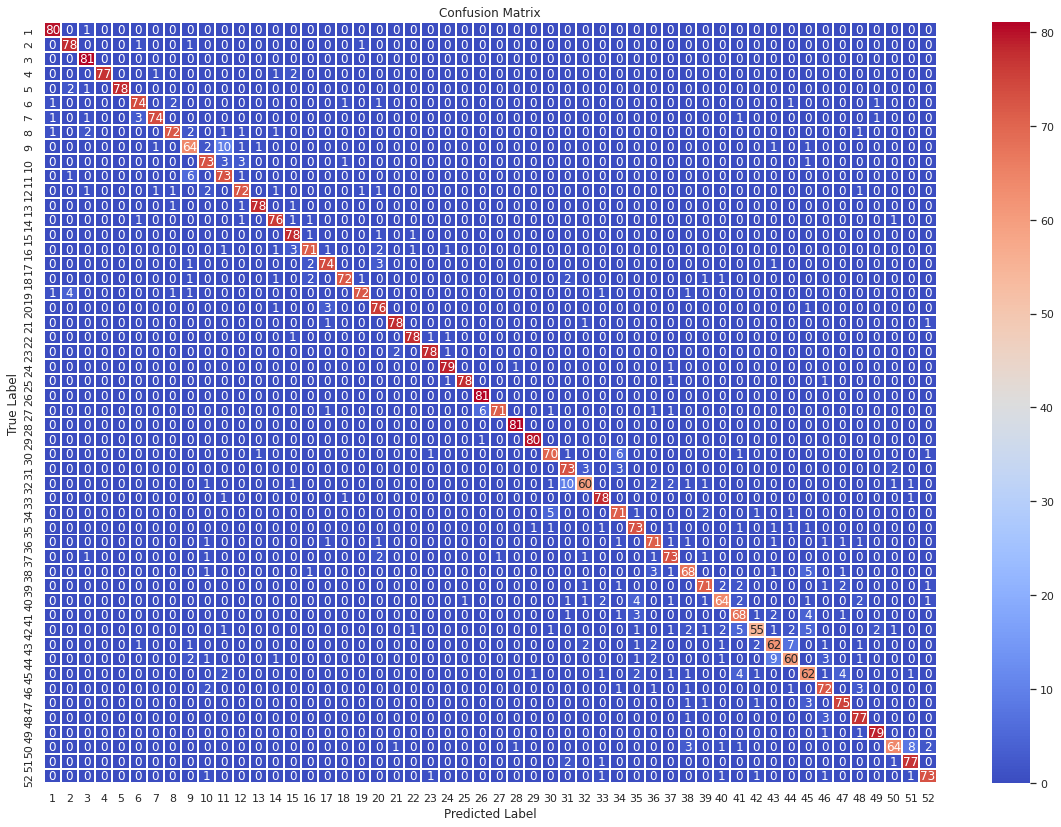

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        81
           1       0.92      0.96      0.94        81
           2       0.92      1.00      0.96        81
           3       1.00      0.95      0.97        81
           4       1.00      0.96      0.98        81
           5       0.93      0.91      0.92        81
           6       0.96      0.91      0.94        81
           7       0.94      0.89      0.91        81
           8       0.81      0.79      0.80        81
           9       0.86      0.90      0.88        81
          10       0.79      0.90      0.84        81
          11       0.90      0.89      0.89        81
          12       0.97      0.96      0.97        81
          13       0.92      0.94      0.93        81
          14       0.90      0.96      0.93        81
          15       0.91      0.88      0.89        81
          16       0.91      0.91      0.91        81
          17       0.96    

In [40]:
y_pred_test = model.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_hot, axis=1)
show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))